# Pagerank

## Graphs
We can use the networkx library to store and manipulate graphs in python

In [210]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


myedges = [(0,1),(2,1),(3,0),(4,5),(5,0),(0,6),(1,5),(1,6),(2,4),(3,2),(4,3),(3,7),(4,7),(5,7),(6,3),(6,4),(6,5),(7,1),(7,6)]

G = nx.DiGraph() ## Directed Graph
G.add_edges_from(myedges)

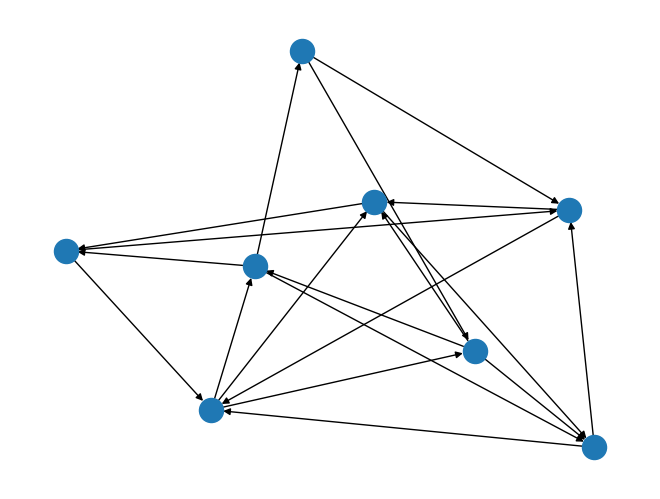

In [231]:
nx.draw(G)

There are a lot of options you can use to display graphs with networkx 

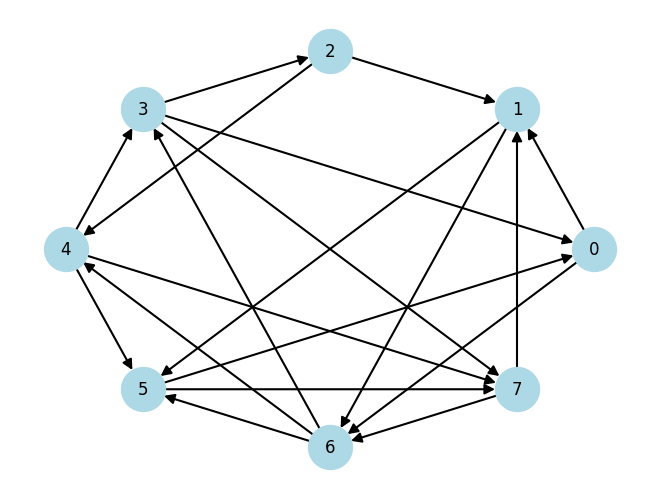

In [240]:
nx.draw(G, pos=nx.circular_layout(G), with_labels = True, width = 1.5, node_color="lightblue", node_size = 1000, arrowstyle="-|>", arrowsize=15 )

In [241]:
# Get the outgoing degree of a vertex
G.out_degree(6)

3

In [242]:
list(G.successors(6))

[3, 4, 5]

In [243]:
list(G.nodes)

[0, 1, 2, 3, 4, 5, 6, 7]

In [173]:
import random

In [246]:
random.choice(list(G.successors(6)))

5

### Simulate a random websurfer
One way to rank the nodes is to simulate a random walk on the graph.  Choose an initial vertex.  Then randomly follow an outgoing edge to another vertex.  Do this many times and count the proportion of time you spend at each vertex

In [249]:
def websim(graph, iterations):
    vertices = list(G.nodes)
    vertexcount = np.zeros(len(vertices))
    currentvertex = random.choice(vertices)
    for i in range(iterations):
        newvertex = random.choice(list(G.successors(currentvertex)))
        currentvertex = newvertex
        vertexcount[currentvertex]+=1
    return 1/iterations * vertexcount


In [250]:
weights = websim(G,1000000)
print(weights)

[0.11781  0.14749  0.032317 0.09685  0.084756 0.170122 0.205501 0.145154]


### Pagerank

Another way is to rank each vertex with a rank with the property that the rank $r_i$ of vertex $i$ is given by the sume $$r_i = \sum \frac{r_j}{d_j}$$
where the sum is over each vertex $j$ for which there is an edge $j \to i$ and $d_j$ is the outgoing degree of vertex $j$.

It is convenient to use the built in adjacency matrix function

In [251]:
A = nx.adjacency_matrix(G)

/var/folders/yv/0wjzc10d30z52y56qczm8s5c0000gp/T/ipykernel_66848/1018844737.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [252]:
A

<8x8 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

nx.adjacency_matrix returns a sparse matrix.  You can get a dense matrix if desired.

In [255]:
A.todense()

matrix([[0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 0, 1, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 1, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 1, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0]])

In [254]:
a = A.todense()

In [193]:
a

matrix([[0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 0, 1, 0, 0, 0],
        [1, 0, 1, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 1, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0]])

In [194]:
a[3]

matrix([[1, 0, 1, 0, 1, 0, 0, 1]])

There is a 1 in row i, column j if there is a directed edge starting at vertex i and terminating at vertex j.  So, the entry "1" in the second row, sixth column is there because there is an edge from the second vertex to the sixth vertex (vertex 1 to vertex 5, since we started counting at 0)

For the pagerank algorithm, we'd like a matrix with the entry $\frac{1}{d_j}$ in the i-th row and j-th column if there is an edge from vertex j to vertex i, and vertex j has d outgoing edges. 

We can determine the number of outgoing edges for each vertex:  The number of edges coming out of vertex i is the total number of 1's in row i.  For example, the number edges originating at vertex 7 is 

In [256]:
print(np.shape(a))
np.sum(a[6])

(8, 8)


3

In [257]:
n,k = np.shape(a)
d = [np.sum(a[i]) for i in range(n)]

In [259]:
print(d) # the outgoing degrees of each vertex

[2, 2, 2, 3, 3, 2, 3, 2]


In [260]:
c = np.array([[1/d[j]* a[j, i] for j in range(n)] for i in range(n)])
print(c)

[[0.         0.         0.         0.33333333 0.         0.5
  0.         0.        ]
 [0.5        0.         0.5        0.         0.         0.
  0.         0.5       ]
 [0.         0.         0.         0.33333333 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.33333333 0.
  0.33333333 0.        ]
 [0.         0.         0.5        0.         0.         0.
  0.33333333 0.        ]
 [0.         0.5        0.         0.         0.33333333 0.
  0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.         0.
  0.         0.5       ]
 [0.         0.         0.         0.33333333 0.33333333 0.5
  0.         0.        ]]


In [261]:
eigenvalues, eigenvectors = np.linalg.eig(c)

In [262]:
eigenvalues

array([ 1.00000000e+00+0.j        , -2.70514331e-01+0.76370066j,
       -2.70514331e-01-0.76370066j, -3.07828932e-01+0.21757611j,
       -3.07828932e-01-0.21757611j,  7.83432628e-02+0.20855756j,
        7.83432628e-02-0.20855756j, -9.79174615e-17+0.j        ])

In [267]:
eigenvectors[:,0]

array([-0.3078325 +0.j, -0.38698943+0.j, -0.08443406+0.j, -0.25330217+0.j,
       -0.2216394 +0.j, -0.44679688+0.j, -0.53826711+0.j, -0.3817123 +0.j])

In [268]:
def mypowermethod(A, y, n):
  for i in range(n):
    y =  np.dot(A,y)
    y = 1/ np.linalg.norm(y)*y
  return y

In [269]:
initv = np.ones(n)-2*np.random.rand(8)
print(initv)

[-0.14058692  0.64107577  0.30461388  0.72064268 -0.93439056  0.33711978
 -0.55560189 -0.3537261 ]


In [270]:
weights2 = mypowermethod(c,initv,100)
print(weights2)

[0.30783249 0.38698948 0.08443406 0.25330214 0.22163938 0.44679684
 0.53826714 0.38171229]


In [271]:
np.dot(c,weights2)

array([0.30783247, 0.38698942, 0.08443405, 0.25330217, 0.22163941,
       0.44679691, 0.53826713, 0.38171226])

In [276]:
weights2 / np.sum(weights2) # scale so the sum is 1

array([0.11744966, 0.14765103, 0.03221477, 0.09664429, 0.08456375,
       0.17046978, 0.20536914, 0.14563758])

In [277]:
weights = websim(G,100000)
print(weights)

[0.11761 0.14532 0.0328  0.09839 0.08526 0.16853 0.20712 0.14497]
